# Capstone Project Bengkel Koding - Deteksi Obesitas
- Nama : Andi Laksono
- NIM : A11.2022.14839

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from google.colab import drive
import sys
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Baca Dataset

In [2]:
# Define the variable
folder_name = "/content/drive/My Drive/Colab Notebooks/datasets/"

In [3]:
drive.mount('/content/drive', force_remount=True)
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [4]:
df = pd.read_csv(f'{folder_name}/ObesityDataSet.csv', sep=',', skipinitialspace=True, na_values="?")

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [8]:
df.shape

(2111, 17)

In [9]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) > 50:
        print(f"{col}: {unique_values[:50]}...")
    else:
        print(f"{col}: {unique_values}")

Age: [ 21.          23.          27.          22.          29.
  24.          26.          41.          30.          52.
  87.77228265  20.          19.          31.          39.
  17.          25.                  nan  55.          38.
  18.          15.          61.          44.          34.
  36.          32.          35.          40.          45.
  33.          51.          94.02627737  56.          28.
  16.          37.         102.68845875  14.          25.196214
  18.503343    21.853826    21.90012     18.306615    21.849705
  19.799054    17.188754    22.285024    21.02497     22.038327  ]...
Gender: ['Female' 'Male' nan]
Height: [1.62       1.52       1.8        1.78       1.5        1.64
 1.72       1.85       1.65       1.77       1.7        1.93
 1.53       1.71       1.69       1.6        1.75       1.68
 1.58       1.79       1.56       1.67       1.66       1.81
 1.82       1.55       1.61       1.63       1.76       1.57
 1.88       1.87       1.89       1.74       1.8

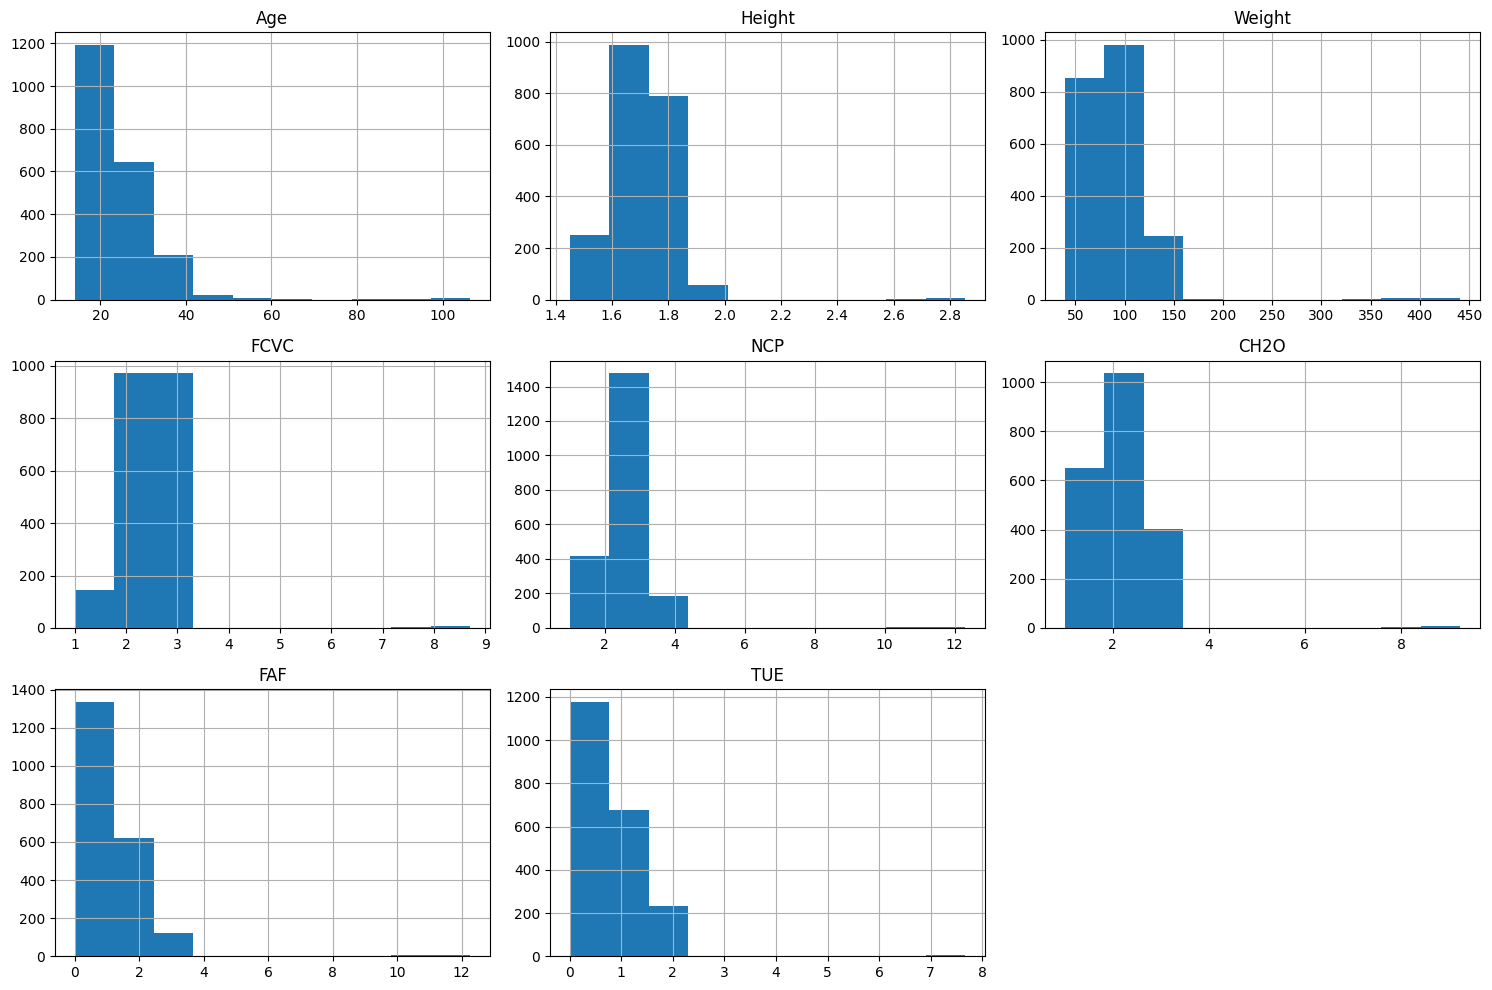

In [10]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

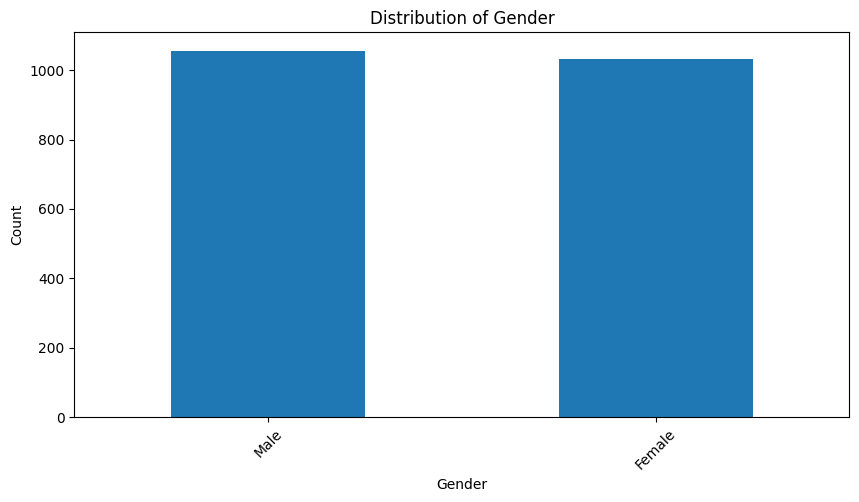

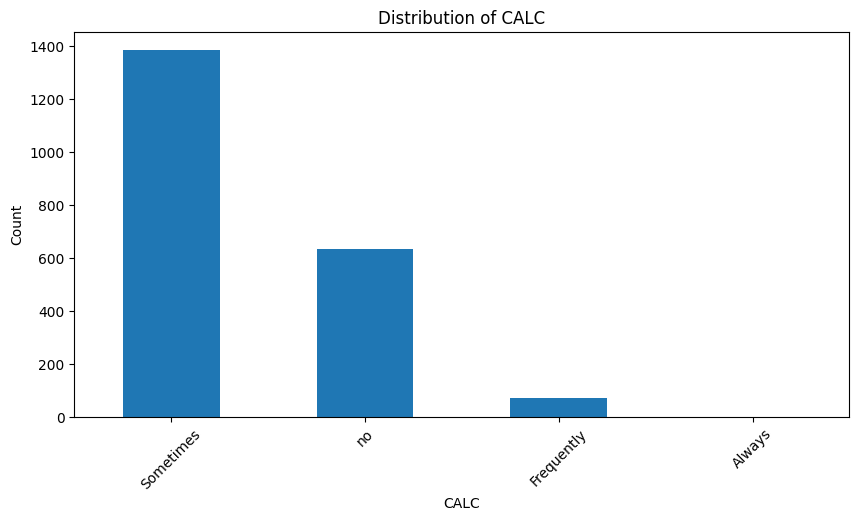

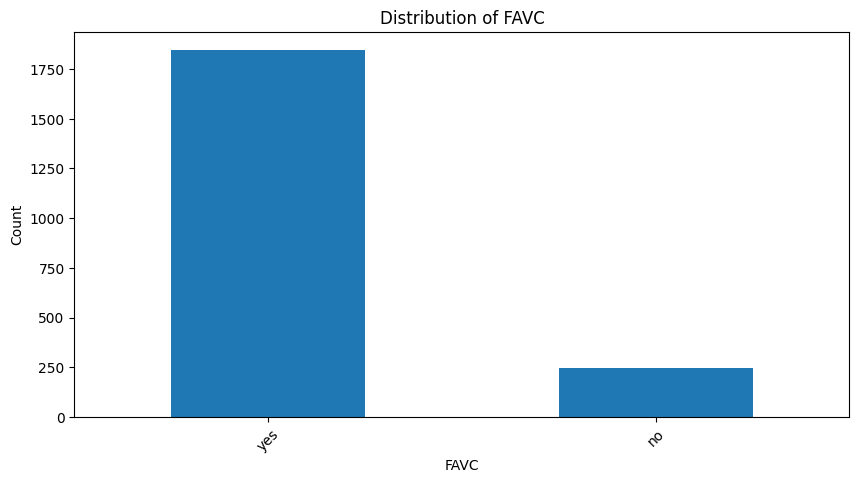

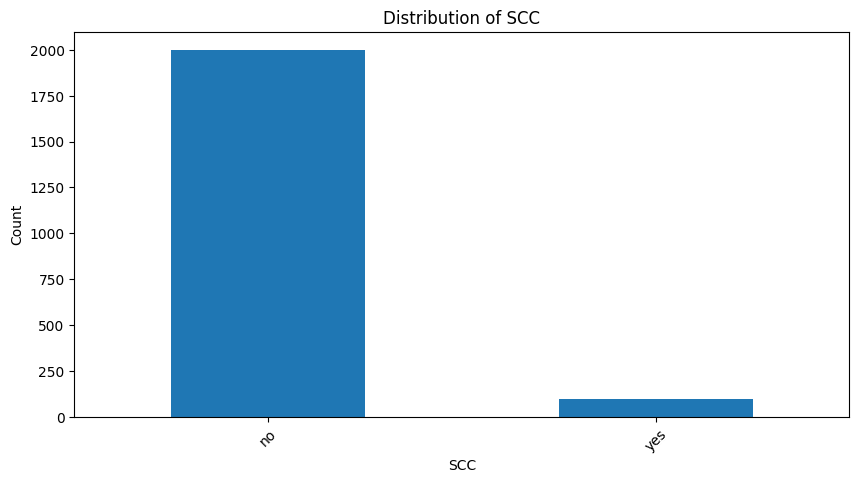

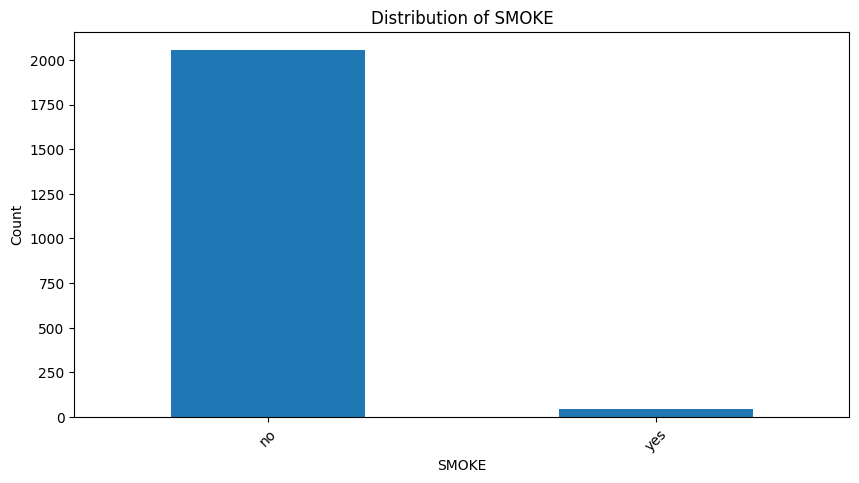

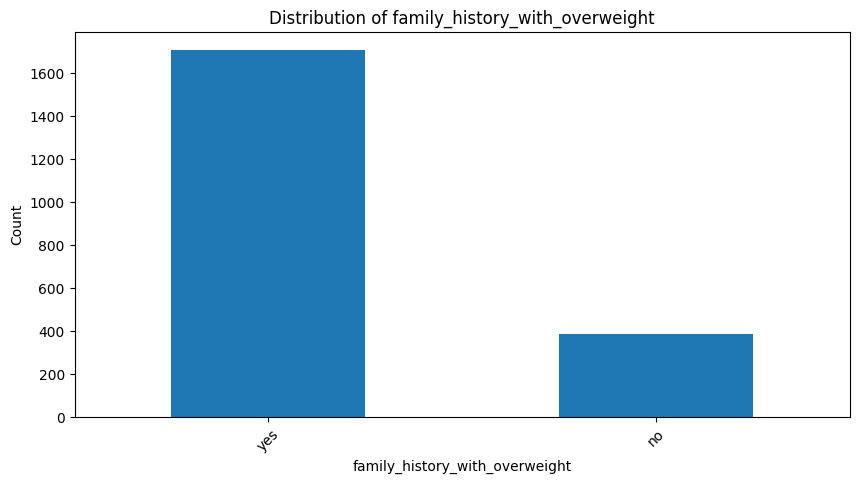

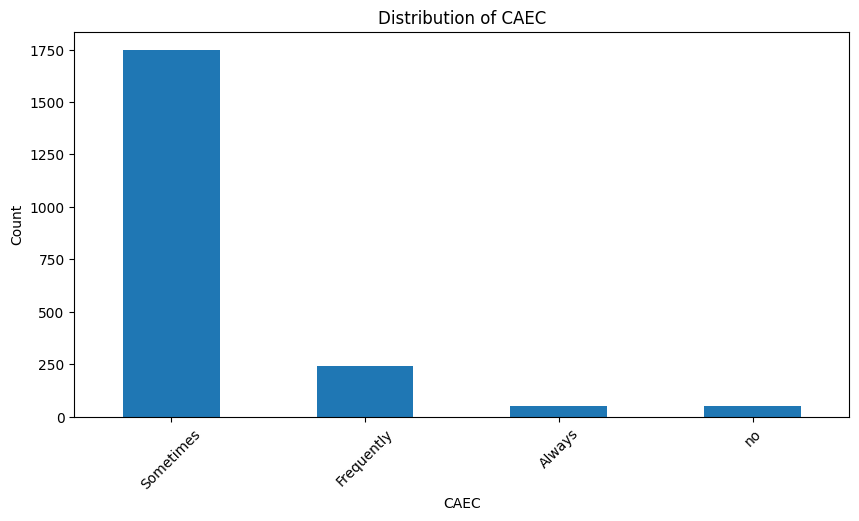

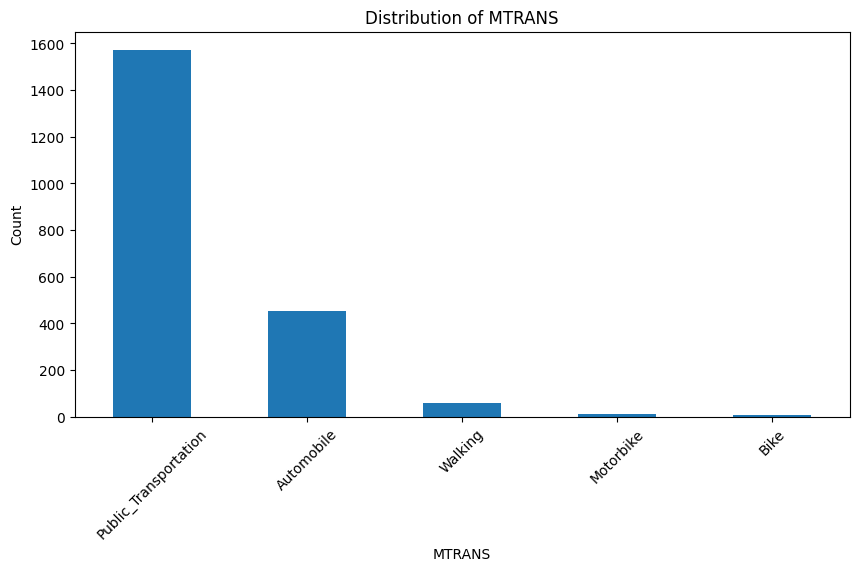

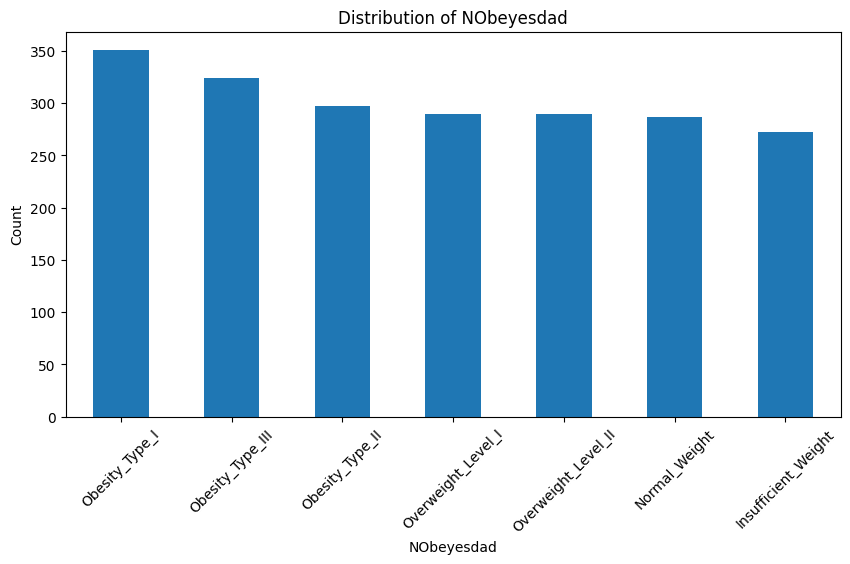

In [11]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [13]:
df.describe(include=['object'])

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2089,2091,2089,2093,2098,2088,2093,2099,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1386,1844,1997,2054,1705,1747,1572,351


In [14]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [15]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
Age                               1.042160
Gender                            1.042160
Height                            1.042160
Weight                            0.900047
CALC                              0.947418
FAVC                              1.042160
FCVC                              0.852676
NCP                               1.042160
SCC                               0.852676
SMOKE                             0.615822
CH2O                              0.710564
family_history_with_overweight    1.089531
FAF                               0.900047
TUE                               0.710564
CAEC                              0.852676
MTRANS                            0.568451
NObeyesdad                        0.000000
dtype: float64


In [16]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 18


In [17]:
# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))


Contoh baris duplikat:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
97   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
145  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
282  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
295  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   

    family_history_with_overweight  FAF  TUE        CAEC  \
97                              no 

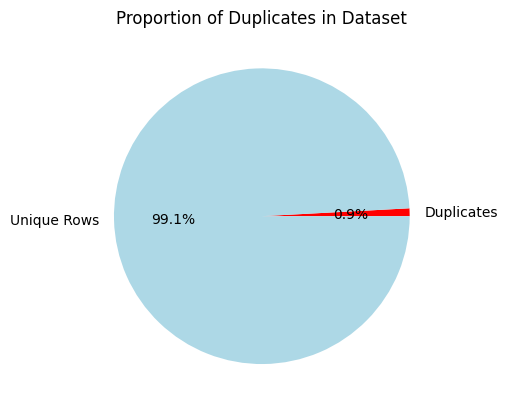

In [18]:
duplicates = len(df) - len(df.drop_duplicates())
unique = len(df.drop_duplicates())
plt.pie(
    [duplicates, unique],
    labels=['Duplicates', 'Unique Rows'],
    autopct='%1.1f%%',
    colors=['red', 'lightblue'])
plt.title('Proportion of Duplicates in Dataset')
plt.show()

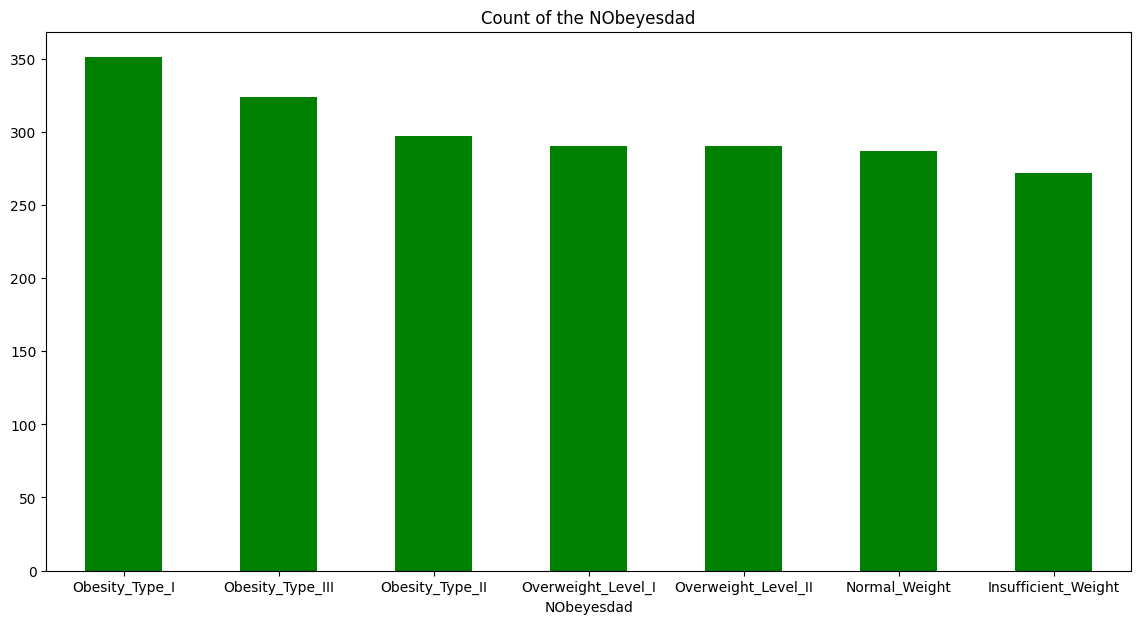

In [19]:
df['NObeyesdad'].value_counts().plot(kind='bar',figsize=(14,7), color=['green'])
plt.title ("Count of the NObeyesdad")
plt.xticks(rotation=0) ;

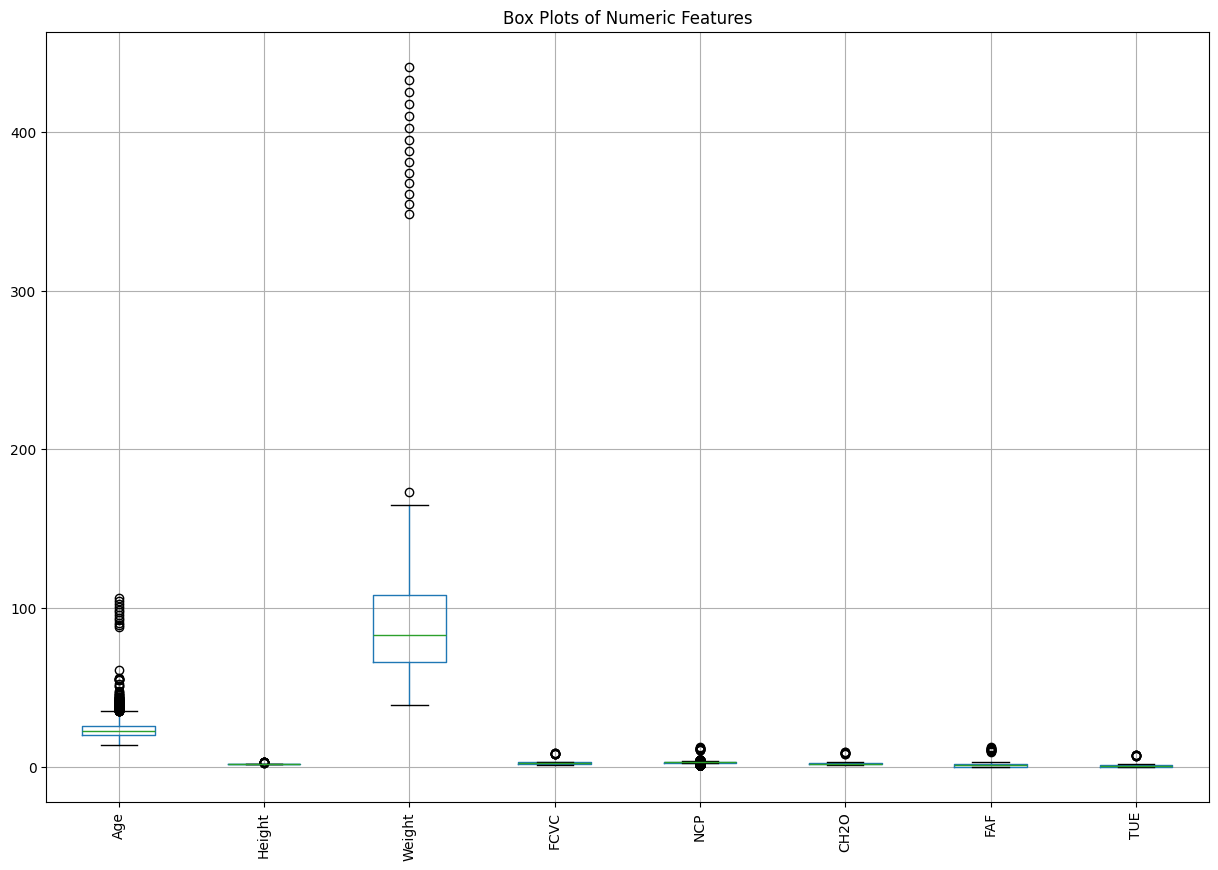

In [20]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

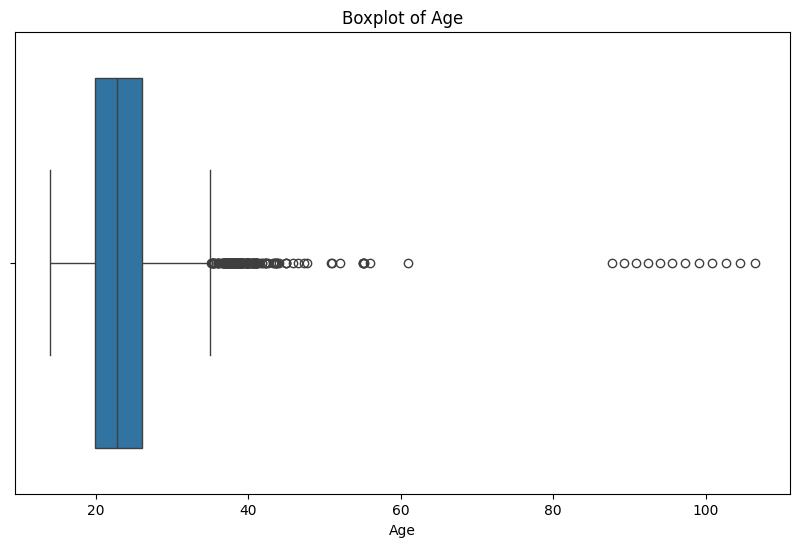

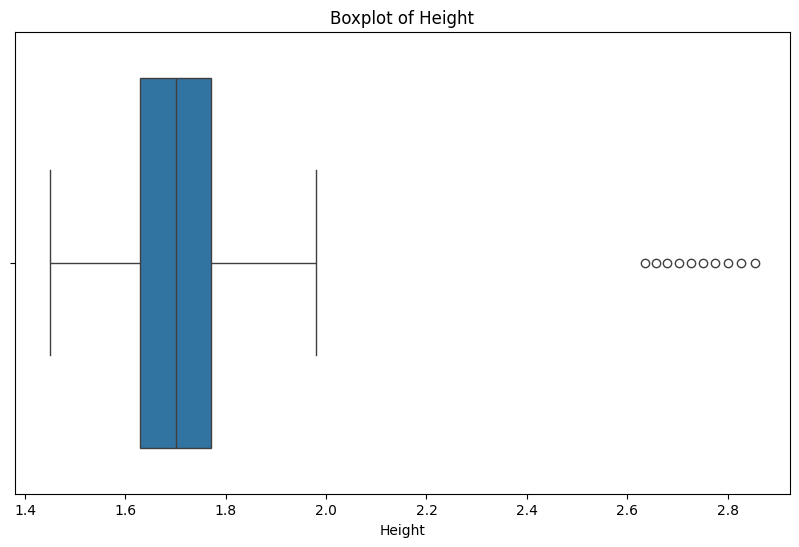

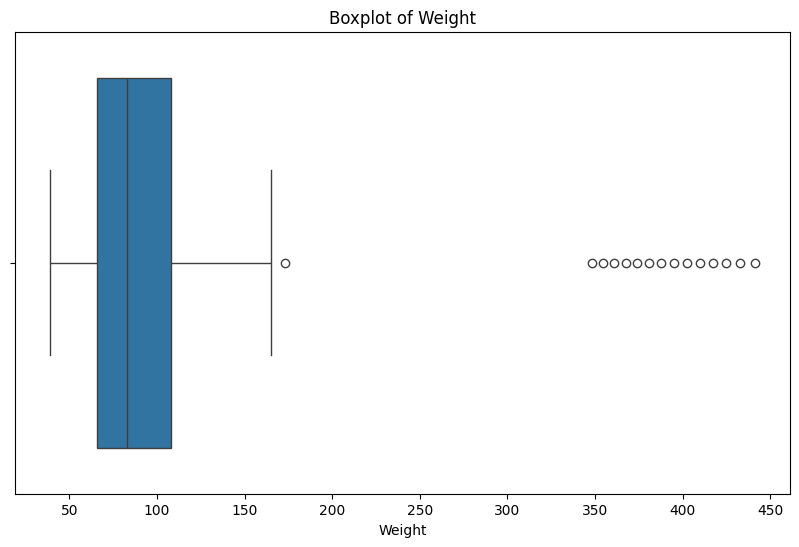

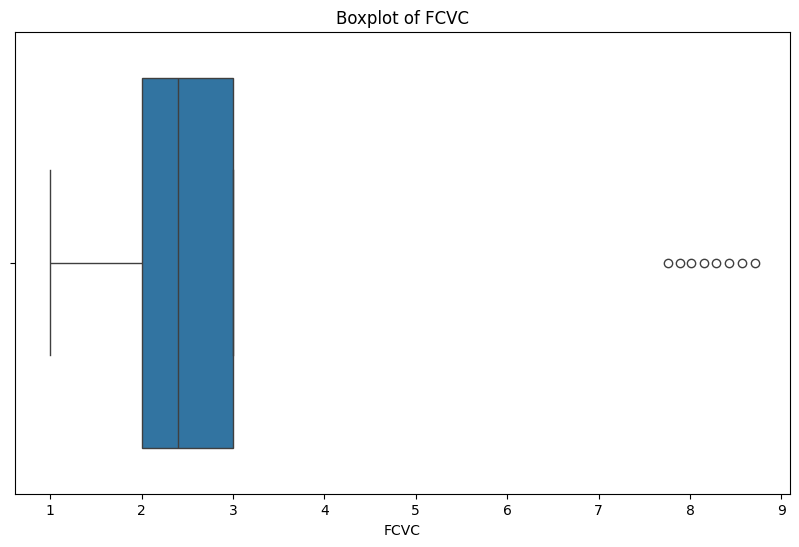

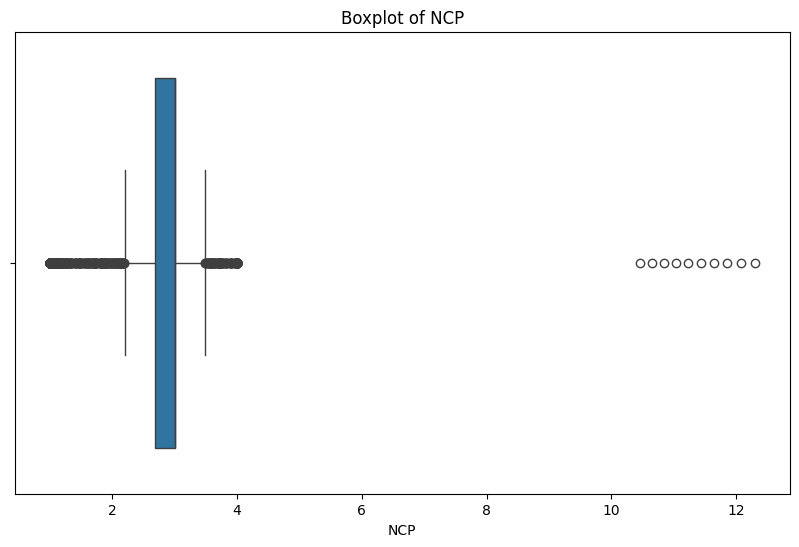

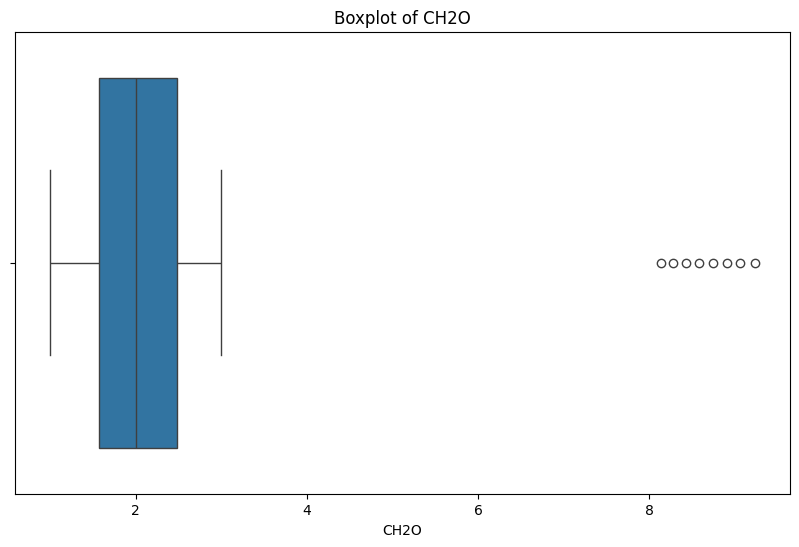

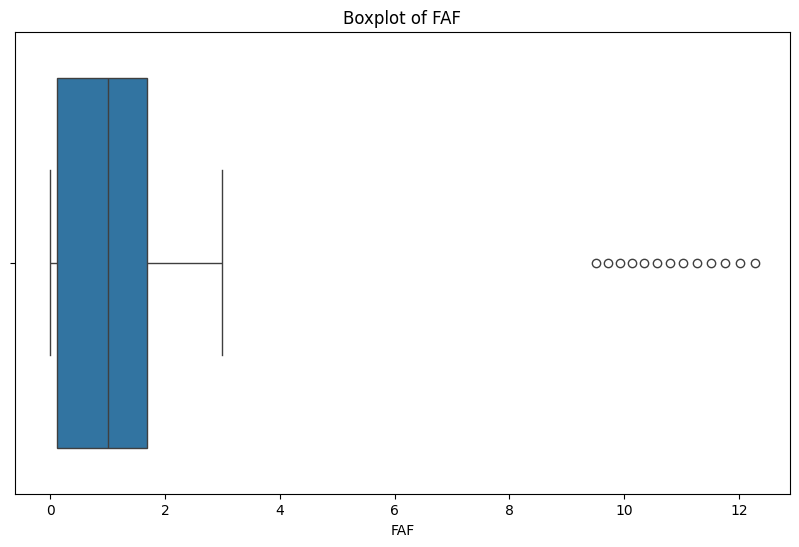

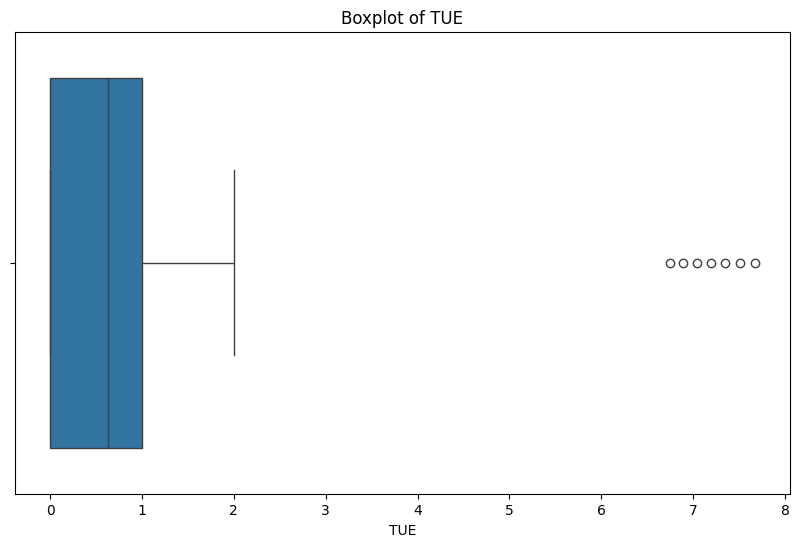

In [21]:
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

### Kesimpulan EDA

- Pada dataset ini terdapat kolom yang berisi data numerik dan data kategorikal pada fitur Gender, CAEC, CALC, MTRANS, dan NObeyesdad sehingga perlu di encode.
- Selain itu pada dataset juga terdapat missing value, data duplikat, imbalance pada target, dan outlier yang perlu dihandle.


# Preprocessing Data

In [22]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                              

<ipython-input-22-1654905950>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-22-1654905950>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [23]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(20)

In [24]:
# Handle jika terdapat duplikat data
df.drop_duplicates(inplace=True)

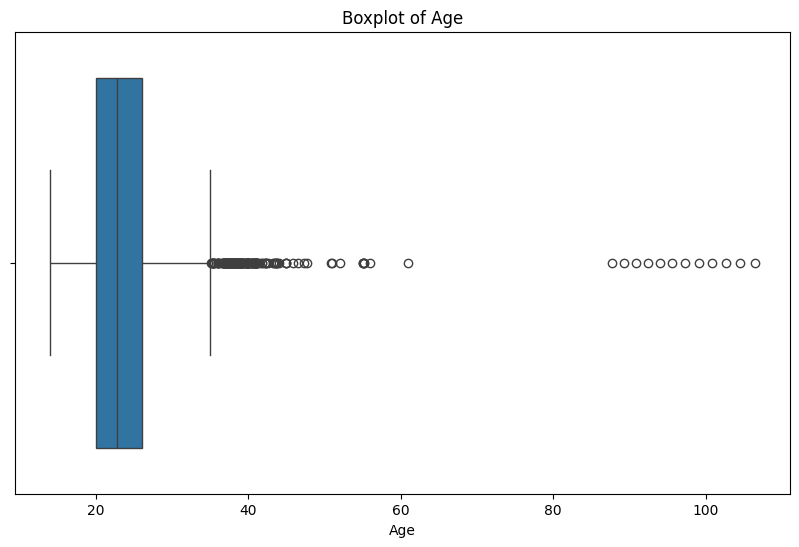

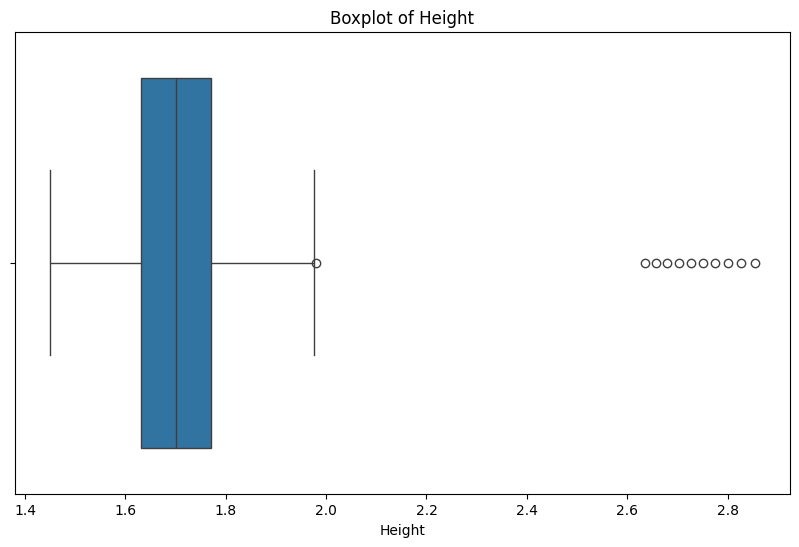

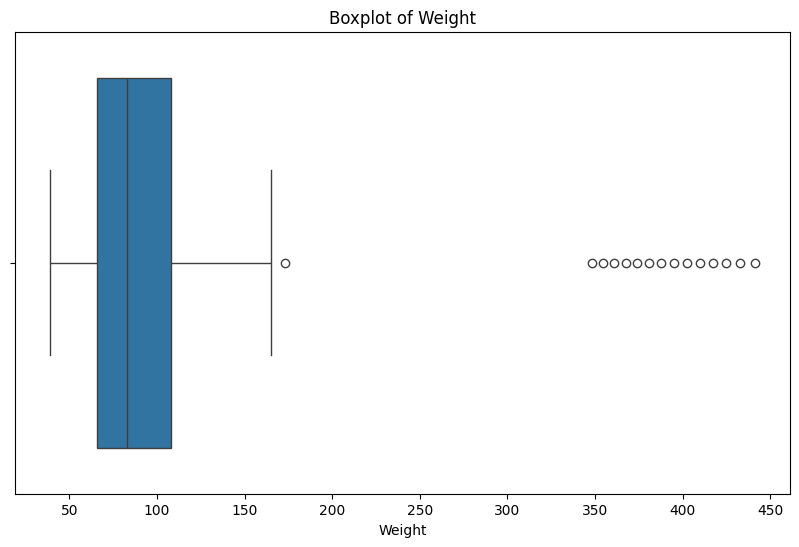

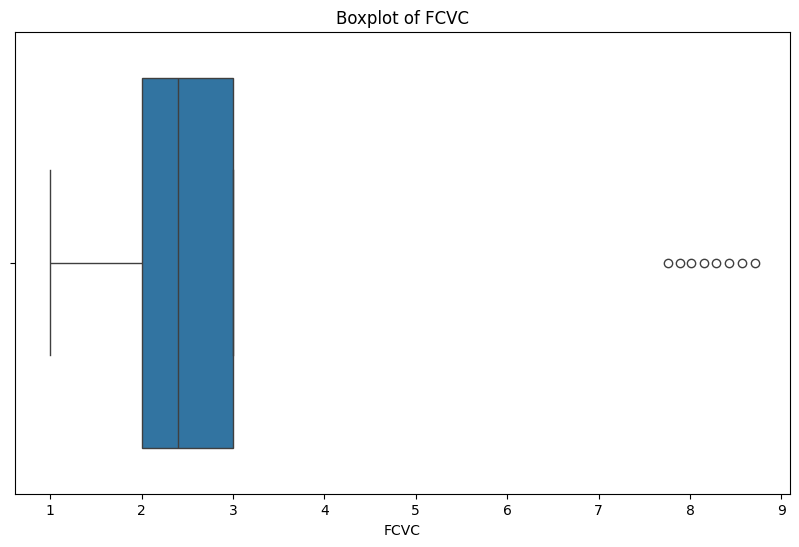

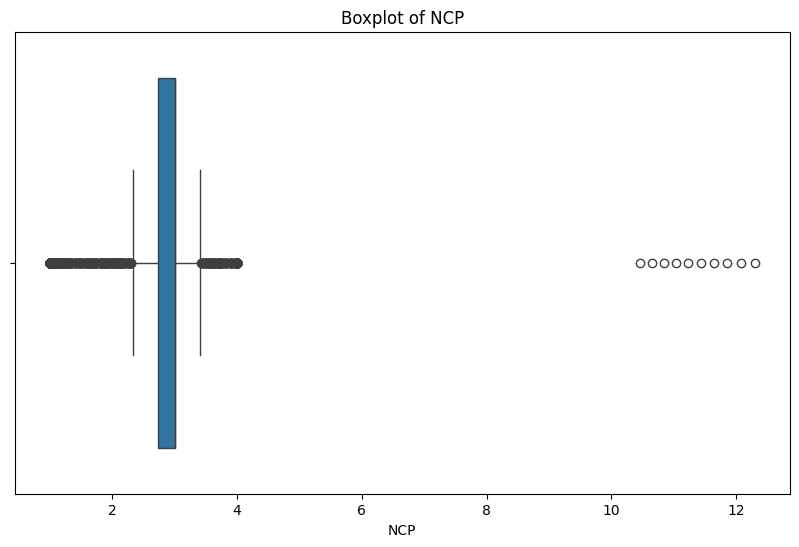

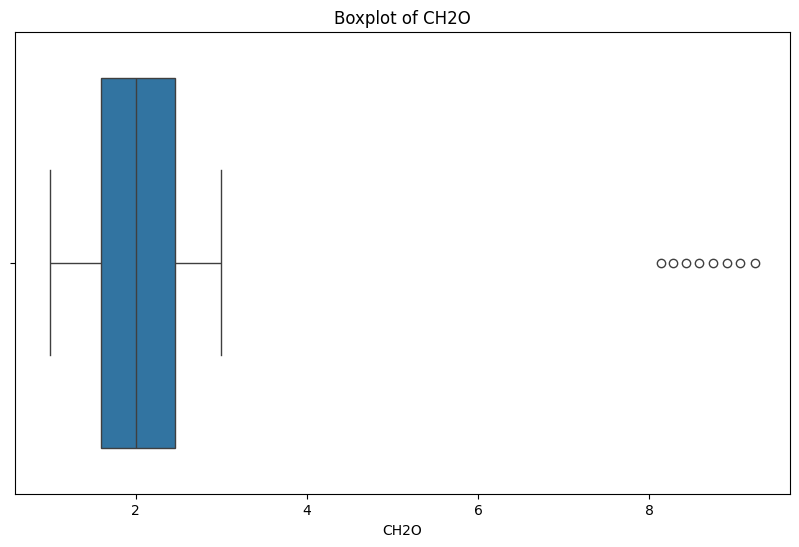

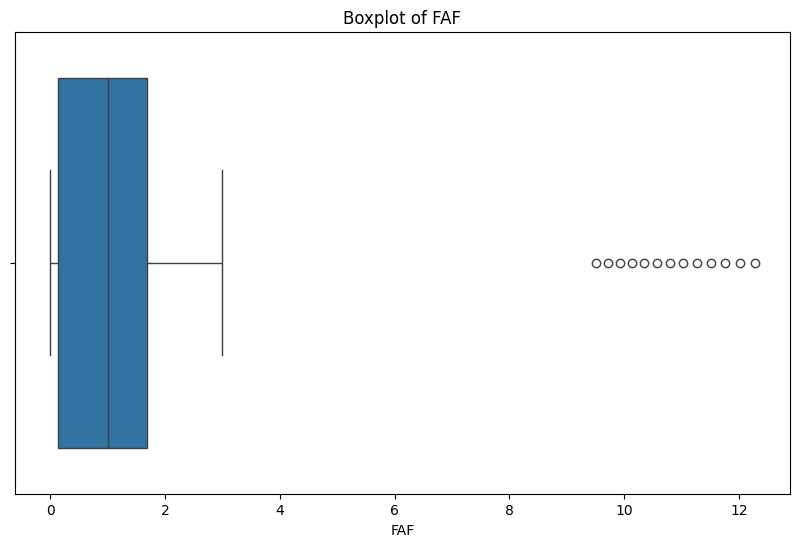

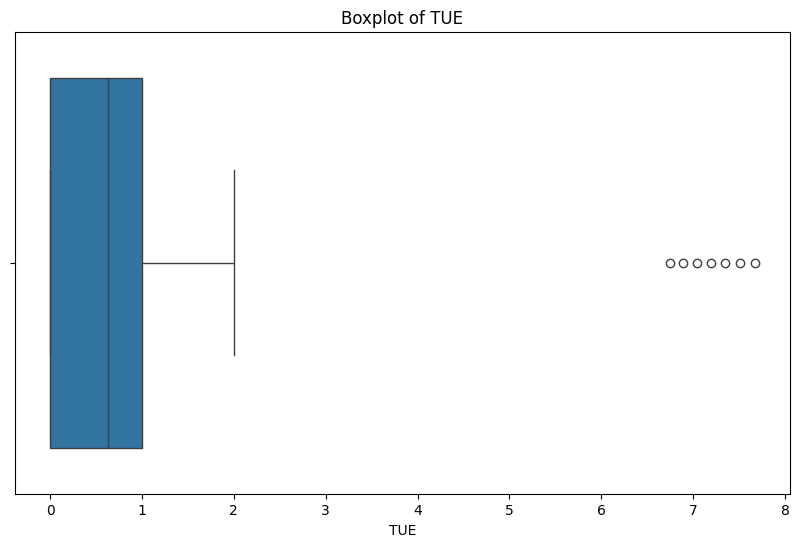

In [25]:
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

In [26]:
data_cleaned = df.copy()

In [27]:
for col in numeric_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    print(f"Kolom {col} telah diatasi outliersnya dengan IQR.")

Kolom Age telah diatasi outliersnya dengan IQR.
Kolom Height telah diatasi outliersnya dengan IQR.
Kolom Weight telah diatasi outliersnya dengan IQR.
Kolom FCVC telah diatasi outliersnya dengan IQR.
Kolom NCP telah diatasi outliersnya dengan IQR.
Kolom CH2O telah diatasi outliersnya dengan IQR.
Kolom FAF telah diatasi outliersnya dengan IQR.
Kolom TUE telah diatasi outliersnya dengan IQR.


In [28]:
df = data_cleaned

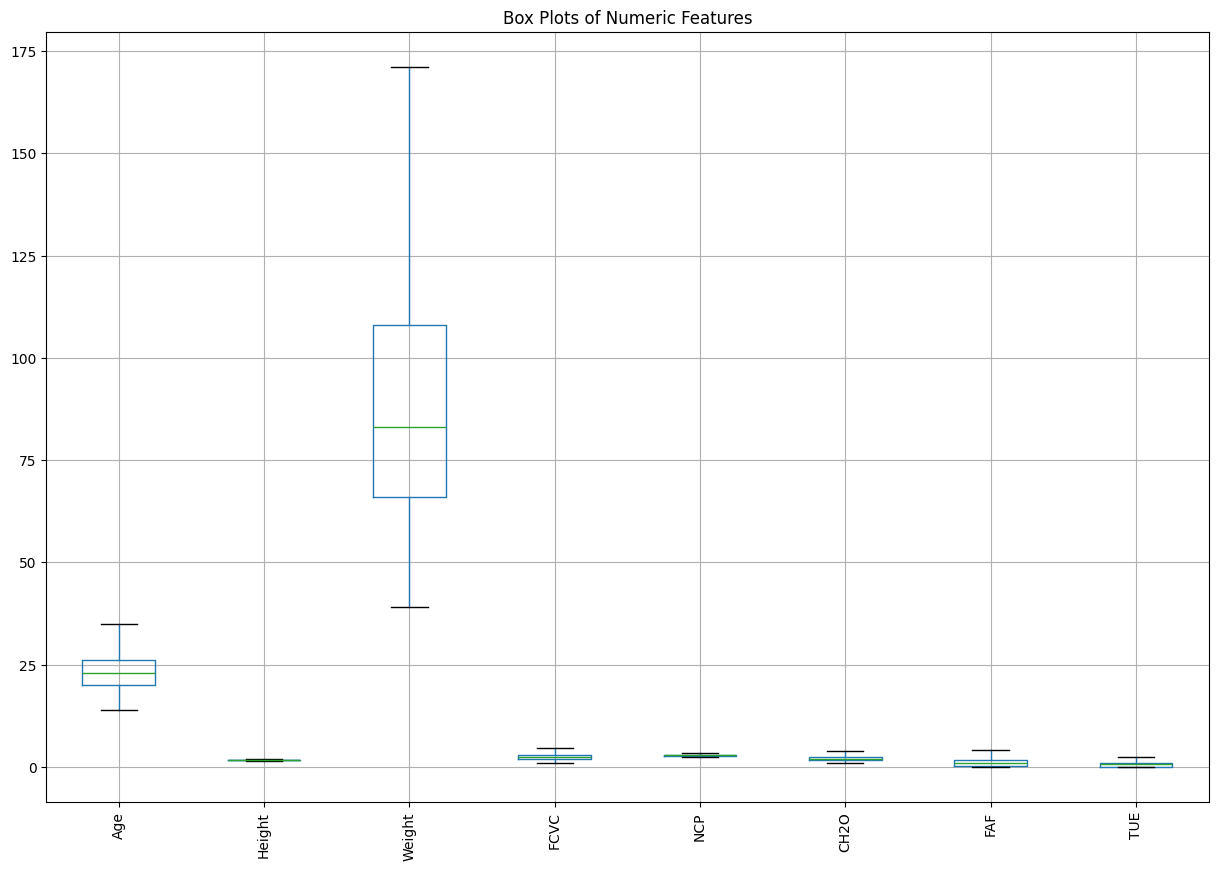

In [29]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2091 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2091 non-null   float64
 1   Gender                          2091 non-null   object 
 2   Height                          2091 non-null   float64
 3   Weight                          2091 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2091 non-null   object 
 6   FCVC                            2091 non-null   float64
 7   NCP                             2091 non-null   float64
 8   SCC                             2091 non-null   object 
 9   SMOKE                           2091 non-null   object 
 10  CH2O                            2091 non-null   float64
 11  family_history_with_overweight  2091 non-null   object 
 12  FAF                             2091 no

In [31]:
enc_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

In [32]:
# Save the encoders
encoders = {}
for col in enc_cols:
    encoders[col] = LabelEncoder().fit(df[col])

with open('/content/drive/MyDrive/Colab Notebooks/Results/label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Encoders berhasil disimpan sebagai 'label_encoders.pkl'")

Encoders berhasil disimpan sebagai 'label_encoders.pkl'


In [33]:
for col in enc_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [34]:
for col in enc_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [35]:
for col in enc_cols:
    print(f"{col}: {df[col].unique()}")

Gender: [0 1]
CALC: [3 2 1 0]
FAVC: [0 1]
SCC: [0 1]
SMOKE: [0 1]
family_history_with_overweight: [1 0]
CAEC: [2 1 0 3]
MTRANS: [3 4 0 2 1]
NObeyesdad: [1 5 6 2 0 3 4]


In [36]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.000000,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.000000,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.000000,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.000000,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,2.307067,0,0,2.0,0,0.0,0.0,2,3,6


In [37]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4
2110,23.664709,0,1.738836,133.472641,2,1,3.0,3.0,0,0,2.863513,1,1.026452,0.714137,2,3,4


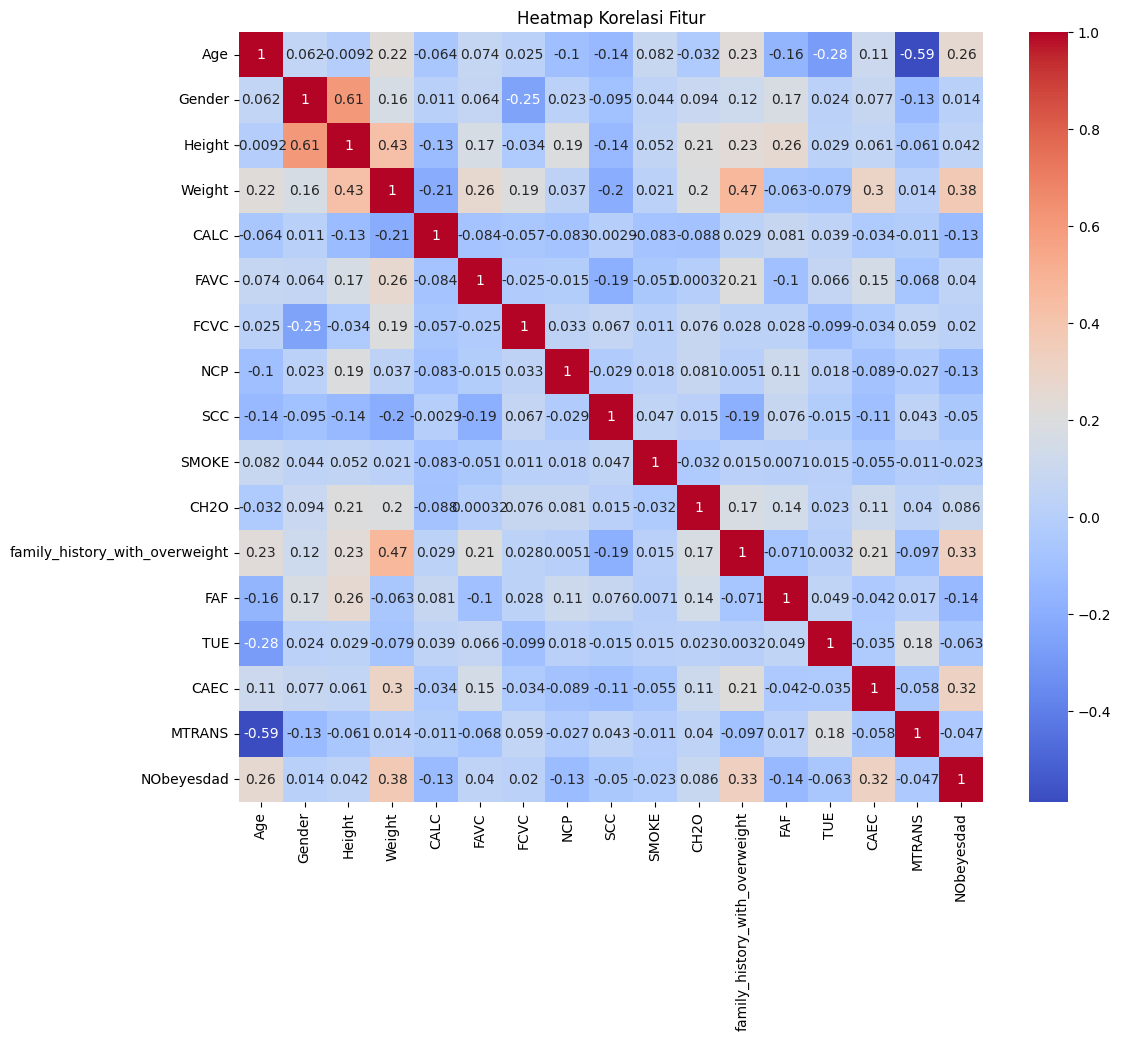

In [38]:
# melihat korelasi antar fitur (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

- tidak ada korelasi tinggi terhadap target. (jika ada, maka harus dihapus. batasan = 0.9)
- untuk konteks klasifikasi, yang dicari adalah korelasi antar fitur rendah

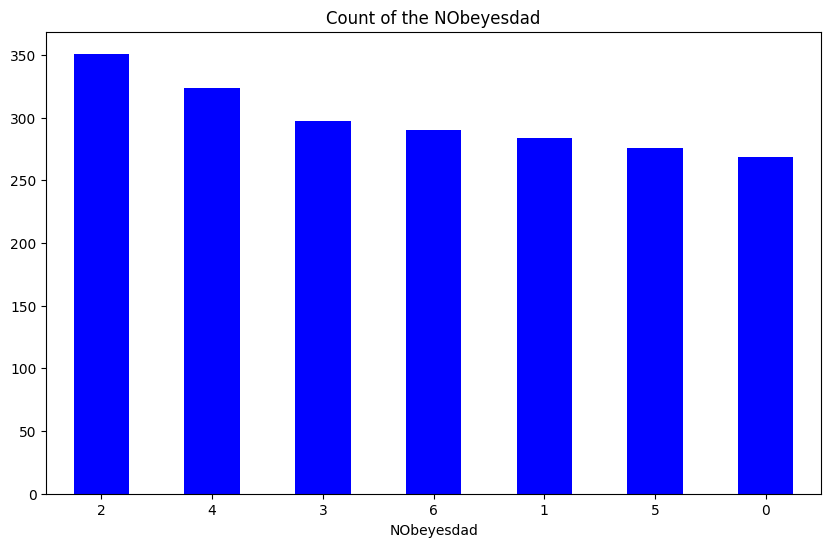

In [39]:
# IMBALANCE
df['NObeyesdad'].value_counts().plot(kind='bar', figsize=(10, 6), color=['blue'])
plt.title("Count of the NObeyesdad")
plt.xticks(rotation=0)
plt.show()  # Menampilkan plot

In [40]:
# Splitting
y = df['NObeyesdad']
X = df.drop(columns=['NObeyesdad'])

# Splitting data untuk SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [41]:
# Handling Imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", pd.Series(y_train_resampled).value_counts())

Sebelum SMOTE: NObeyesdad
2    281
4    259
3    237
6    232
1    227
5    221
0    215
Name: count, dtype: int64
Setelah SMOTE: NObeyesdad
3    281
0    281
5    281
6    281
1    281
4    281
2    281
Name: count, dtype: int64


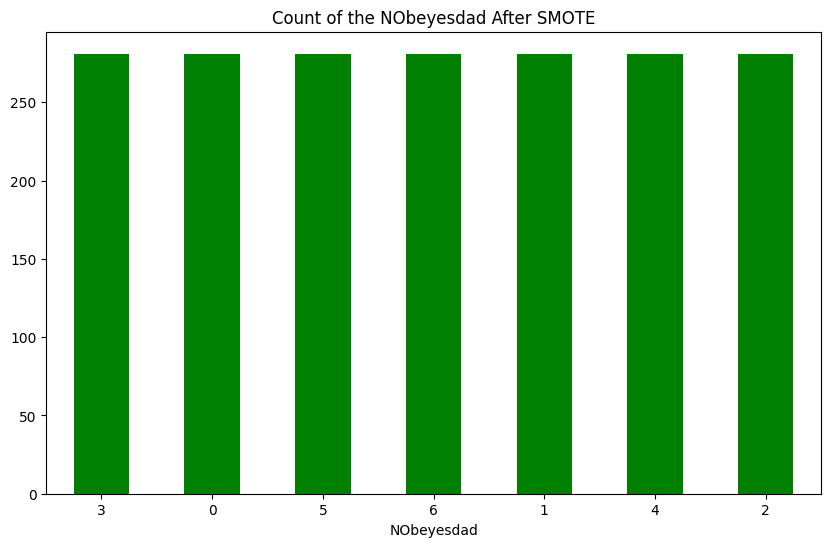

In [42]:
# Plot hasil setelah SMOTE
y_train_resampled.value_counts().plot(kind='bar', figsize=(10, 6), color=['green'])
plt.title("Count of the NObeyesdad After SMOTE")
plt.xticks(rotation=0)
plt.show()

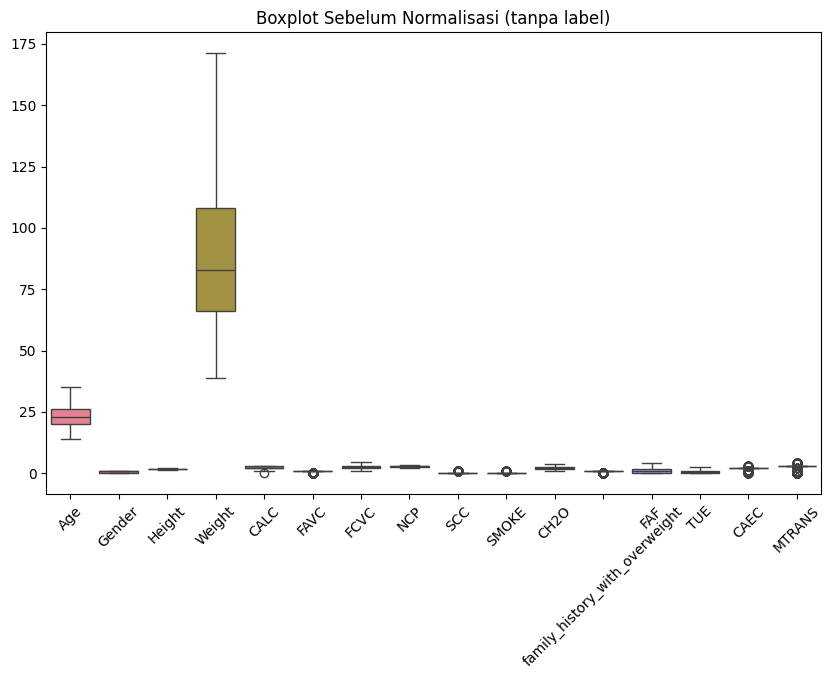

In [43]:
# Visualisasi sebelum dan sesudah normalisasi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['NObeyesdad']))
plt.title('Boxplot Sebelum Normalisasi (tanpa label)')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Proses Normalisai
scaler = StandardScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)

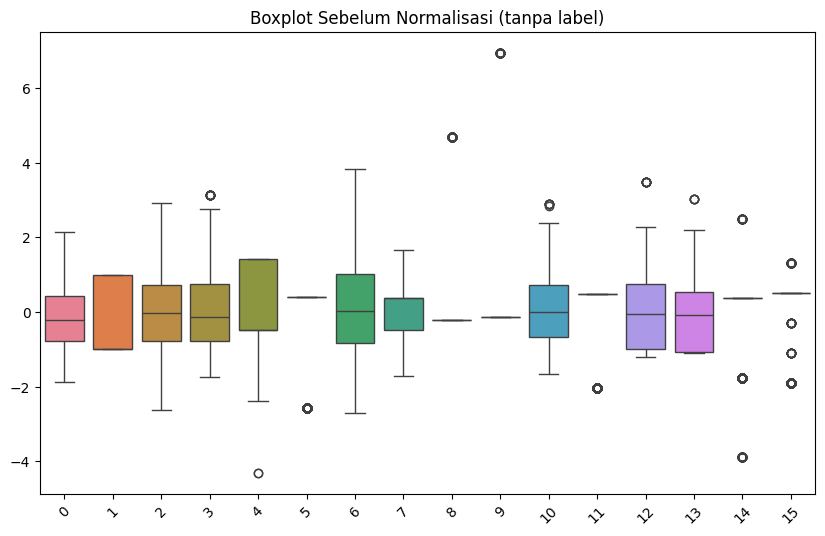

In [45]:
# Visualisasi sebelum dan sesudah normalisasi
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_resampled_normalized)
plt.title('Boxplot Sebelum Normalisasi (tanpa label)')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/Results/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler berhasil disimpan sebagai 'scaler.pkl'")

Scaler berhasil disimpan sebagai 'scaler.pkl'


### Kesimpulan Preprocessing

- Missing value telah diatasi, kolom kategorikal dihandle dengan mengisinya dengan modus, sedangkan kolom numerik diisi dengan median.
- Data duplikat dihandle dengan drop data.
- Selanjutnya adalah menghandle outlier dengan metode IQR karena distribusi data tidak normal(skewed).
- Kolom dengan tipe data kategorikal diencode menggunakan Labelencoder.
- Pada heatmap korelasi fitur terhadap target tidak ada nilai yang mendekati 1 jadi tidak ada fitur yang dihapus.
- Pada kolom target terdapat imbalance data jadi perlu dihandle, disini kita menggunakan SMOTE.
- Kemudian yang terakhir menormalisasi data menggunakan StandartScaler.


# Permodelan dan Evaluasi

In [ ]:
def eval_model(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    print(f"=== {model_name} ===")
    print(classification_report(y_test_data, y_pred))
    sns.heatmap(confusion_matrix(y_test_data, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## SVM

SVM Tanpa Tuning
=== SVM Tanpa Tuning ===
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.71      0.81      0.75        57
           2       0.91      0.91      0.91        70
           3       0.93      0.93      0.93        60
           4       1.00      0.98      0.99        65
           5       0.79      0.80      0.79        55
           6       0.85      0.79      0.82        58

    accuracy                           0.88       419
   macro avg       0.88      0.88      0.88       419
weighted avg       0.89      0.88      0.88       419



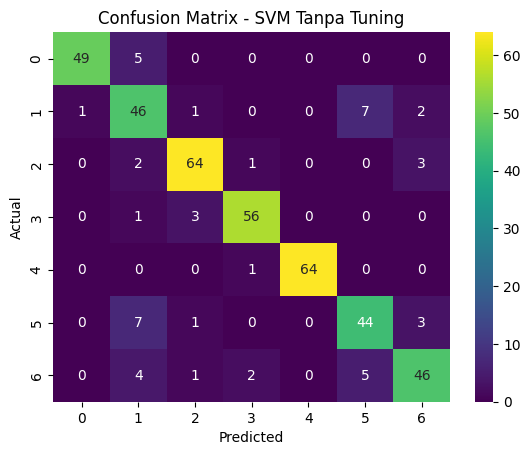

In [ ]:
svm = SVC(probability=True, random_state=42)

print("SVM Tanpa Tuning")
eval_model(svm, X_train_resampled_normalized, y_train_resampled, X_test_normalized, y_test, "SVM Tanpa Tuning")

## Decision Tree

Decision Tree Tanpa Tuning
=== Decision Tree Tanpa Tuning ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.83      0.84      0.83        57
           2       0.93      0.93      0.93        70
           3       0.98      0.97      0.97        60
           4       1.00      0.98      0.99        65
           5       0.75      0.75      0.75        55
           6       0.88      0.88      0.88        58

    accuracy                           0.91       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.91      0.91      0.91       419



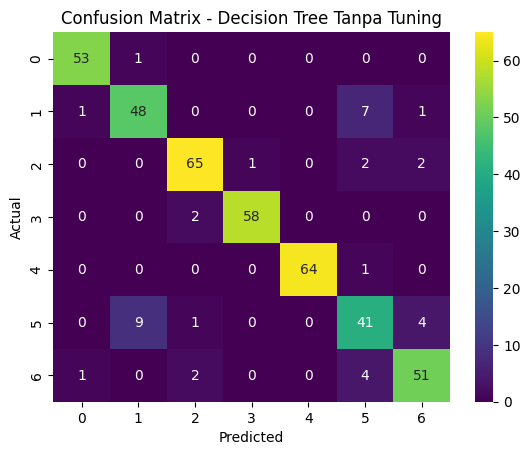

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

print("Decision Tree Tanpa Tuning")
eval_model(dt, X_train_resampled_normalized, y_train_resampled, X_test_normalized, y_test, "Decision Tree Tanpa Tuning")

## KNN

KNN Tanpa Tuning
=== KNN Tanpa Tuning ===
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        54
           1       0.74      0.54      0.63        57
           2       0.79      0.87      0.83        70
           3       0.85      0.92      0.88        60
           4       0.98      1.00      0.99        65
           5       0.75      0.71      0.73        55
           6       0.75      0.76      0.75        58

    accuracy                           0.82       419
   macro avg       0.82      0.82      0.81       419
weighted avg       0.82      0.82      0.82       419



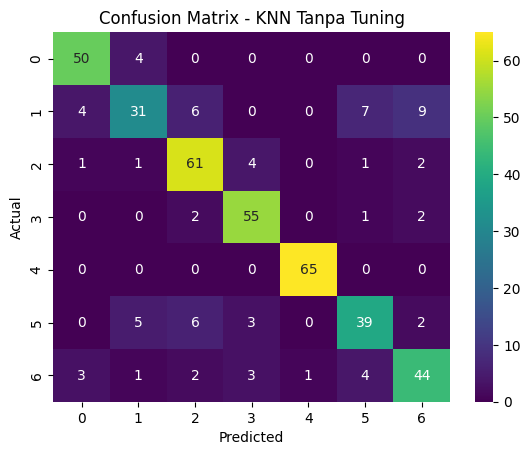

In [ ]:
knn = KNeighborsClassifier()

print("KNN Tanpa Tuning")
eval_model(knn, X_train_resampled_normalized, y_train_resampled, X_test_normalized, y_test, "KNN Tanpa Tuning")

In [ ]:
# Inisiasi Model

# SVM
svm.fit(X_train_resampled_normalized, y_train_resampled)
svm_acc = accuracy_score(y_test, svm.predict(X_test_normalized))

# Decision Tree
dt.fit(X_train_resampled_normalized, y_train_resampled)
dt_acc = accuracy_score(y_test, dt.predict(X_test_normalized))

# KNN
knn.fit(X_train_resampled_normalized, y_train_resampled)
knn_acc = accuracy_score(y_test, knn.predict(X_test_normalized))

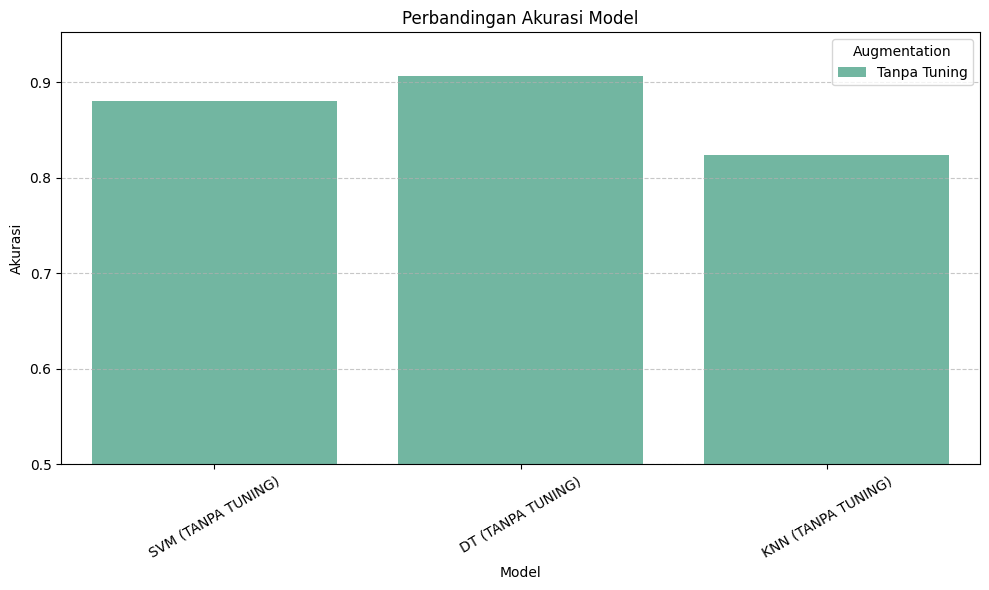

In [ ]:
# Nama model
model_names = [
    'SVM (TANPA TUNING)', 'DT (TANPA TUNING)', 'KNN (TANPA TUNING)'
]

# Akurasi dari semua model
accuracies = [
    svm_acc, dt_acc, knn_acc
]

# Buat DataFrame untuk plotting
df_result = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Augmentation': ['Tanpa Tuning'] * len(model_names)
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Augmentation', data=df_result, palette='Set2')
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0.5)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Kesimpulan Modeling

- Setelah melakukan pemodelan hasil akurasi sangat baik, tingkat akurasi paling baik pada model Decision Tree sebesar 91%, urutan kedua model SVM sebesar 88%, dan yang paling kecil pada model KNN sebesar 82%.
- Pada model SVM terdapat overfitting pada precision kelas 4.
- Pada Model Decision Tree terdapat overfitting pada precision kelas 4.
- Pada Model KNN juga terdapat overfitting pada recall kelas 4.
- Untuk mengatasi overfitting bisa dilakukan Hyperparameter tuning.

# Hyperparameter Tuning

### SVM

In [ ]:
svm_params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'], # Menggunakan nilai kernel yang valid
    'gamma': ['scale', 'auto', 0.1, 1] # Menambahkan parameter gamma untuk kernel rbf
}

In [ ]:
svm_random = GridSearchCV(SVC(probability=True, random_state=42),
                                svm_params,
                                cv=2, scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)
svm_random.fit(X_train_resampled_normalized, y_train_resampled)
best_svm = svm_random.best_estimator_
y_svm_pred = best_svm.predict(X_test_normalized)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


Optimized SVM - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        54
           1       0.96      0.84      0.90        57
           2       0.93      0.96      0.94        70
           3       0.98      0.98      0.98        60
           4       0.98      1.00      0.99        65
           5       0.83      0.87      0.85        55
           6       0.89      0.81      0.85        58

    accuracy                           0.93       419
   macro avg       0.92      0.92      0.92       419
weighted avg       0.93      0.93      0.93       419



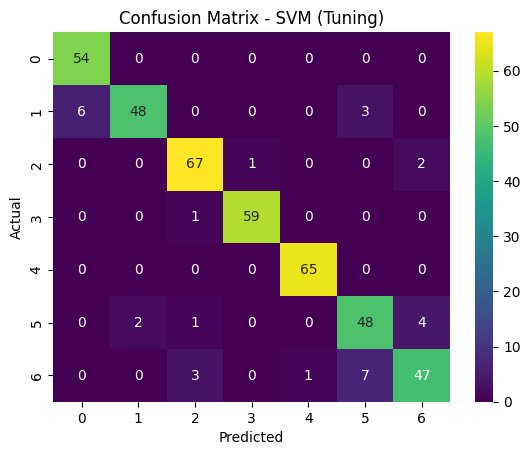

In [ ]:
print("Optimized SVM - Best Parameters:", svm_random.best_params_)
print(classification_report(y_test, y_svm_pred))

sns.heatmap(confusion_matrix(y_test, y_svm_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - SVM (Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

In [ ]:
dt_params = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       dt_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)
dt_grid.fit(X_train_resampled_normalized, y_train_resampled)

best_dt = dt_grid.best_estimator_
y_dt_pred = best_dt.predict(X_test_normalized)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


Optimized Decision Tree - Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.90      0.95      0.92        57
           2       0.97      0.96      0.96        70
           3       1.00      1.00      1.00        60
           4       0.97      0.97      0.97        65
           5       0.91      0.87      0.89        55
           6       0.95      0.95      0.95        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



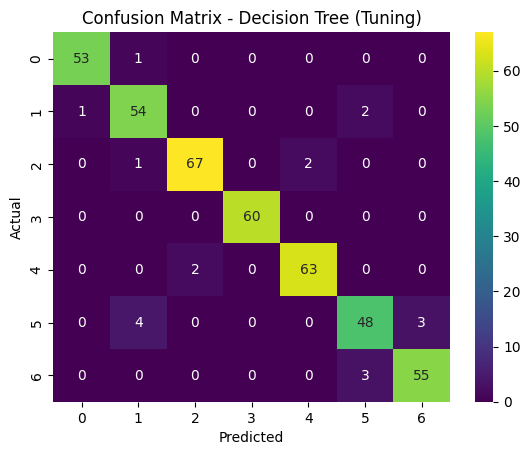

In [ ]:
print("Optimized Decision Tree - Best Parameters:", dt_grid.best_params_)
print(classification_report(y_test, y_dt_pred))

sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Decision Tree (Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_resampled_normalized, y_train_resampled)

best_knn = knn_grid.best_estimator_
y_knn_pred = best_knn.predict(X_test_normalized)

Optimized KNN - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.78      0.63      0.70        57
           2       0.89      0.96      0.92        70
           3       0.95      0.98      0.97        60
           4       0.98      1.00      0.99        65
           5       0.80      0.80      0.80        55
           6       0.88      0.86      0.87        58

    accuracy                           0.89       419
   macro avg       0.88      0.89      0.88       419
weighted avg       0.89      0.89      0.89       419



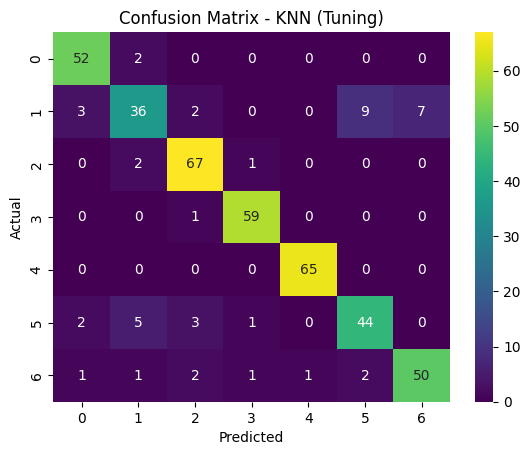

In [ ]:
print("Optimized KNN - Best Parameters:", knn_grid.best_params_)
print(classification_report(y_test, y_knn_pred))

sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - KNN (Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Inisiasi Model dan hitung akurasi

# SVM
svm_acc_before_tuning = accuracy_score(y_test, svm.predict(X_test_normalized))
svm_acc_after_tuning = accuracy_score(y_test, best_svm.predict(X_test_normalized))

# Decision Tree
dt_acc_before_tuning = accuracy_score(y_test, dt.predict(X_test_normalized))
dt_acc_after_tuning = accuracy_score(y_test, best_dt.predict(X_test_normalized))

# KNN
knn_acc_before_tuning = accuracy_score(y_test, knn.predict(X_test_normalized))
knn_acc_after_tuning = accuracy_score(y_test, best_knn.predict(X_test_normalized))

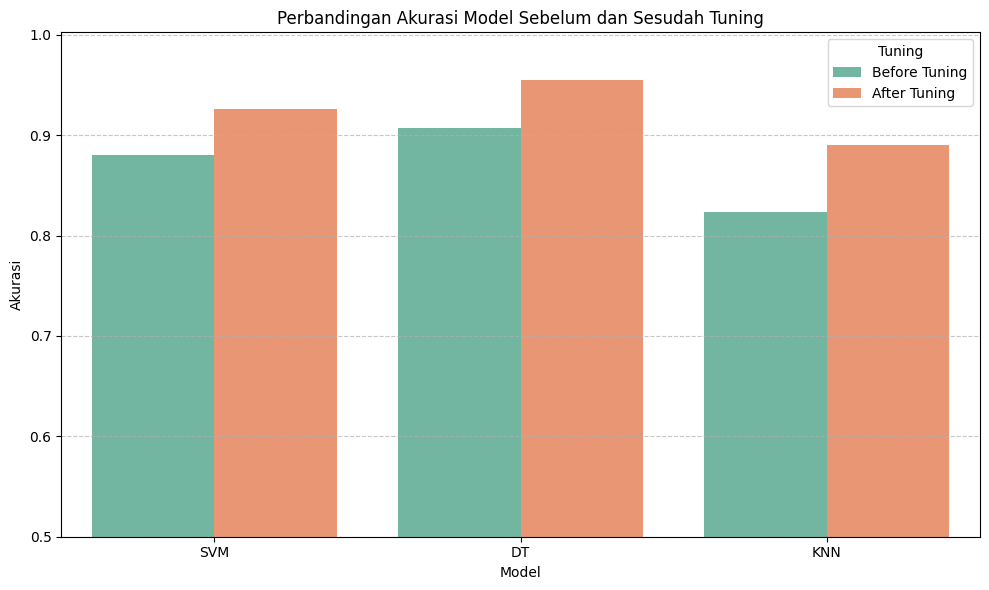

In [ ]:
# Nama model
model_names = [
    'SVM', 'DT', 'KNN',
    'SVM', 'DT', 'KNN'
]

# Akurasi dari semua model
accuracies = [
    svm_acc_before_tuning, dt_acc_before_tuning, knn_acc_before_tuning,
    svm_acc_after_tuning, dt_acc_after_tuning, knn_acc_after_tuning
]

# Buat DataFrame untuk plotting
df_result = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Tuning': ['Before Tuning'] * 3 + ['After Tuning'] * 3
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Tuning', data=df_result, palette='Set2')
plt.title("Perbandingan Akurasi Model Sebelum dan Sesudah Tuning")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0.5)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print()

- Setelah melakukan hyperparameter tuning semua model mengalami peningkatan, artinya tujuan kita untuk meningkatkan akurasi tercapai.
- SVM mendapatkan hasil yang tinggi pada akurasi sebesar 93%
- Decision tree mendapatkan hasil paling tinggi yaitu akurasi sebesar 95%.
- KNN mendapatkan akurasi sebesar 89%.

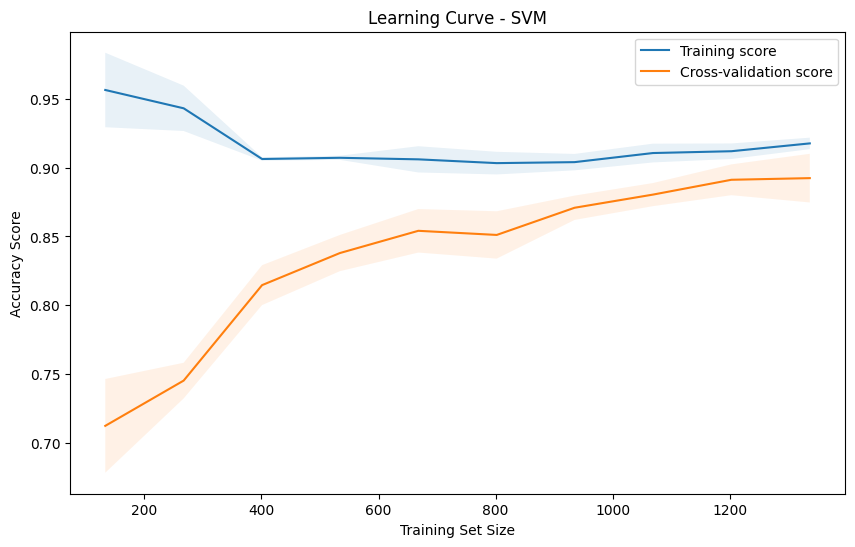

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - SVM')
plt.legend()
plt.show()

In [ ]:
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=5)
print("Akurasi Model Terbaik SVM :", svm_acc_after_tuning)
print("Cross-validation scores:", cv_scores_svm)
print("Mean CV score:", np.mean(cv_scores_svm))
print("Standard deviation of CV score:", np.std(cv_scores_svm))

Akurasi Model Terbaik SVM : 0.9260143198090692
Cross-validation scores: [0.88358209 0.91044776 0.86227545 0.89820359 0.90718563]
Mean CV score: 0.8923389042809904
Standard deviation of CV score: 0.017681875686883567


- Akurasi cukup tinggi, stabilitas cukup baik.

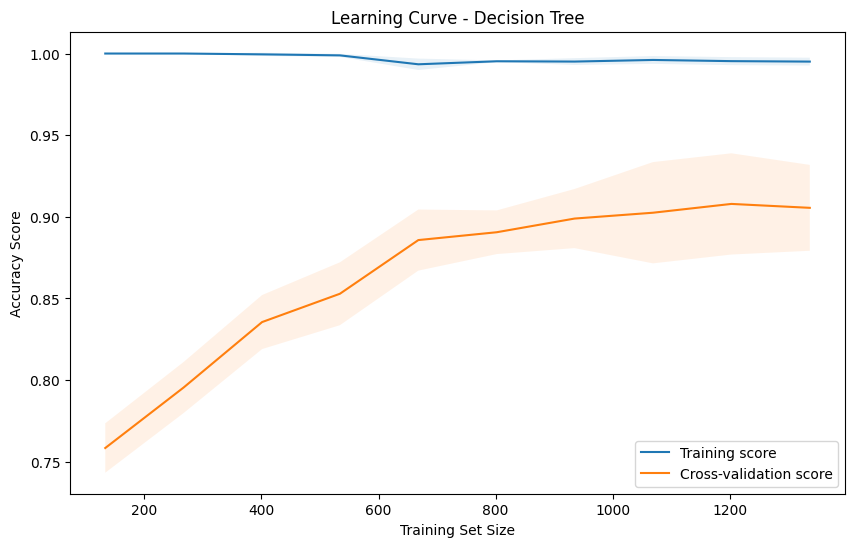

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_dt, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Decision Tree')
plt.legend()
plt.show()

In [ ]:
cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=5)
print("Akurasi Model Terbaik Decision Tree :", dt_acc_after_tuning)
print("Cross-validation scores:", cv_scores_dt)
print("Mean CV score:", np.mean(cv_scores_dt))
print("Standard deviation of CV score:", np.std(cv_scores_dt))

Akurasi Model Terbaik Decision Tree : 0.954653937947494
Cross-validation scores: [0.92835821 0.89850746 0.86227545 0.93712575 0.9011976 ]
Mean CV score: 0.9054928948074001
Standard deviation of CV score: 0.026300012986943806


- Akurasi dan CV score paling tinggi, namun stabilitas sedikit lebih rendah (std dev paling tinggi).

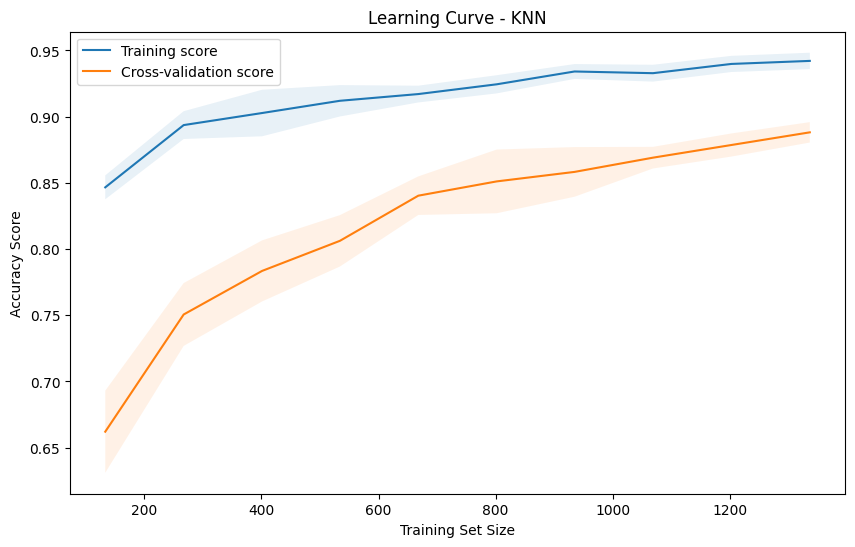

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - KNN')
plt.legend()
plt.show()

In [ ]:
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5)
print("Akurasi Model Terbaik KNN :", knn_acc_after_tuning)
print("Cross-validation scores:", cv_scores_knn)
print("Mean CV score:", np.mean(cv_scores_knn))
print("Standard deviation of CV score:", np.std(cv_scores_knn))


Akurasi Model Terbaik KNN : 0.8902147971360382
Cross-validation scores: [0.89552239 0.88059701 0.89520958 0.87724551 0.89221557]
Mean CV score: 0.8881580123335417
Standard deviation of CV score: 0.007702906261931377


- Akurasi dan CV score cukup baik, stabilitas sangat tinggi (std dev paling rendah).

### Kesimpulan Hyperparameter Tuning

- Setelah dilakukan hyperparameter tuning masih terdapat overfitting pada tiap model, kemungkinan hal ini disebabkan oleh kurangnya jumlah data.
- Meskipun masih terdapat overfitting, tetapi overfitting tersebut tidak berpengaruh signifikan secara negatif.
- Decision Tree mencapai akurasi 0.954, yang merupakan yang tertinggi di antara ketiga model. Ini menunjukkan bahwa dengan hyperparameter terbaiknya, Decision Tree mampu melakukan prediksi paling akurat pada test set.
- Decision Tree juga memiliki mean cross-validation score tertinggi yaitu 0.904. Ini adalah metrik paling krusial untuk mengukur seberapa baik model dapat menggeneralisasi ke data yang tidak terlihat (dunia nyata).
- Meskipun KNN memiliki standar deviasi CV score yang paling rendah (0.008), yang menandakan stabilitas dan konsistensi yang sangat tinggi, performa akurasi dan mean CV score-nya (0.890 dan 0.888) sedikit di bawah Decision Tree.
- SVM berada di tengah-tengah dari segi performa, dengan akurasi model terbaik 0.926 dan mean CV score 0.892, serta standar deviasi yang cukup baik.
- Perbedaan standar deviasi antara Decision Tree (0.026) dan SVM (0.018) atau KNN (0.008) tidaklah signifikan secara drastis untuk mengesampingkan keunggulan Decision Tree dalam akurasi dan kemampuan generalisasi.
- Oleh karena itu, jika tujuan utama adalah mendapatkan performa akurasi terbaik pada data baru, Decision Tree adalah pilihan terbaik di antara ketiga model ini.

In [ ]:
# Simpan model terbaik SVM
with open('/content/drive/MyDrive/Colab Notebooks/Results/best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

print("Model SVM terbaik berhasil disimpan sebagai 'best_svm_model.pkl'")

# Simpan model terbaik Decision Tree
with open('/content/drive/MyDrive/Colab Notebooks/Results/best_dt_model.pkl', 'wb') as f:
    pickle.dump(best_dt, f)

print("Model Decision Tree terbaik berhasil disimpan sebagai 'best_dt_model.pkl'")

# Simpan model terbaik KNN
with open('/content/drive/MyDrive/Colab Notebooks/Results/best_knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)

print("Model KNN terbaik berhasil disimpan sebagai 'best_knn_model.pkl'")

Model SVM terbaik berhasil disimpan sebagai 'best_svm_model.pkl'
Model Decision Tree terbaik berhasil disimpan sebagai 'best_dt_model.pkl'
Model KNN terbaik berhasil disimpan sebagai 'best_knn_model.pkl'
